In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as nnf
import torch.optim as optim


In [2]:

#train_data = torchvision.datasets.MNIST(root='../data',download=False,transform=transform,train=True)
#train_loader = torch.utils.data.DataLoader(train_data,batch_size=4,shuffle=True)

train_loader = torch.utils.data.DataLoader(
        torchvision.datasets.MNIST('data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           #transforms.Normalize((0.1307,), (0.3081,))
])),batch_size=4,shuffle=True)

test_loader = torch.utils.data.DataLoader(
        torchvision.datasets.MNIST('data', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
])),batch_size=4,shuffle=True)
j=0
for i,data in enumerate(train_loader,0):
    if(j<1):
        j+=1
        #print ("i=",i,"\n")
        print (data[0])

#NOTE:: keep a "raw" folder and "processed" folder. Place mnist data in raw folder

tensor([[[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          ...,
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]],


        [[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          ...,
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]],


        [[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.000

In [3]:
classes=('0','1','2','3','4','5','6','7','8','9')


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(1)))

    1


In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(1,10,5)
        self.conv2 = nn.Conv2d(10,20,5)
        self.dropout = nn.Dropout2d()
        self.fc1 = nn.Linear(320,50)
        self.fc2 = nn.Linear(50,10)
        #self.fc3 = nn.Linear(84,10)
    def forward(self,x):
        x = nnf.max_pool2d(nnf.relu(self.conv1(x)),(2,2))
        x = nnf.max_pool2d(nnf.relu(self.conv2(x)),2)
        x = x.view(-1,self.num_flat_features(x))
        x = nnf.relu(self.fc1(x))
        x = nnf.dropout(x,self.training)
        #x = nnf.relu(self.fc2(x))
        x = self.fc2(x)
        return nnf.log_softmax(x,dim=1)
    def num_flat_features(self,x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
net = Net()

In [9]:
#training
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.01)
for epoch in range(2):
    running_loss=0.0
    for i,data in enumerate(train_loader,0):
        inputs,labels = data
        optimizer.zero_grad()
        print (type(inputs))
        print (inputs.shape)
        outputs = net(inputs)
        
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
    
        running_loss +=loss.item()
        if(i>10):
            break
    

<class 'torch.Tensor'>
torch.Size([4, 1, 28, 28])
<class 'torch.Tensor'>
torch.Size([4, 1, 28, 28])
<class 'torch.Tensor'>
torch.Size([4, 1, 28, 28])
<class 'torch.Tensor'>
torch.Size([4, 1, 28, 28])
<class 'torch.Tensor'>
torch.Size([4, 1, 28, 28])
<class 'torch.Tensor'>
torch.Size([4, 1, 28, 28])
<class 'torch.Tensor'>
torch.Size([4, 1, 28, 28])
<class 'torch.Tensor'>
torch.Size([4, 1, 28, 28])
<class 'torch.Tensor'>
torch.Size([4, 1, 28, 28])
<class 'torch.Tensor'>
torch.Size([4, 1, 28, 28])
<class 'torch.Tensor'>
torch.Size([4, 1, 28, 28])
<class 'torch.Tensor'>
torch.Size([4, 1, 28, 28])
<class 'torch.Tensor'>
torch.Size([4, 1, 28, 28])
<class 'torch.Tensor'>
torch.Size([4, 1, 28, 28])
<class 'torch.Tensor'>
torch.Size([4, 1, 28, 28])
<class 'torch.Tensor'>
torch.Size([4, 1, 28, 28])
<class 'torch.Tensor'>
torch.Size([4, 1, 28, 28])
<class 'torch.Tensor'>
torch.Size([4, 1, 28, 28])
<class 'torch.Tensor'>
torch.Size([4, 1, 28, 28])
<class 'torch.Tensor'>
torch.Size([4, 1, 28, 28])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:      7


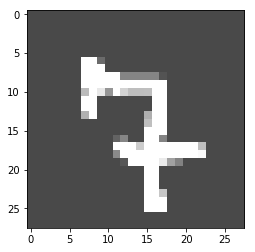

In [7]:
dataiter = iter(test_loader)
images, labels = dataiter.next()
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(1)))

In [9]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)
print (predicted)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(1)))

tensor([ 7])
Predicted:      7


In [10]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy:: %d %%' % (
    100 * correct / total))


Accuracy:: 97 %


In [11]:
torch.save(net.state_dict(), "/home/raghu/Desktop/infilect/week1/myModelNormalized.pth")